In [28]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os
import seaborn as sns
from scipy import stats
import sklearn.preprocessing as skp
import sklearn.cluster as skc
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import train_test_split
from scipy import linalg
import itertools
from joblib import dump, load

In [4]:
from matplotlib.patches import Ellipse
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange","green","pink"])




def draw_ellipse(mean, covariance, alpha,color,ax=None):
    ax = plt.gca()
    v, w = linalg.eigh(covariance)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        #if not np.any(Y_ == i):
         #   continue
        #plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi  # convert to degrees
    ell = Ellipse(mean, v[0], v[1], angle=180.0 + angle, color=color)
    #ell.set_clip_box(splot.bbox)
    ell.set_alpha(alpha)
    #ax.add_patch(ell)
    ax.add_artist(ell)
        


In [9]:
outdir = './data/processed_data'

In [10]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"diabetes_data_train.csv" )    
X_train = pd.read_csv(filename)

## Decide on the cluster count using Elbow method 

In [ ]:
###Decide n-cluster using Elbow Method
bic=[]
aic =[]
k_range = range(2,10)
for i in k_range:
    gmm_temp = GaussianMixture(n_components=i, n_init=10)
    gmm_temp.fit(X_train)
    bic.append(gmm_temp.bic(X_train))
    aic.append(gmm_temp.aic(X_train))

# save the data for future use
bic_filename = os.path.join(outdir, f"bic_scores2_10.npy" )    
np.save(bic_filename, bic)

aic_filename = os.path.join(outdir, f"aic_scores2_10.npy" )    
np.save(aic_filename, aic)

In [7]:
print(len(bic))

8


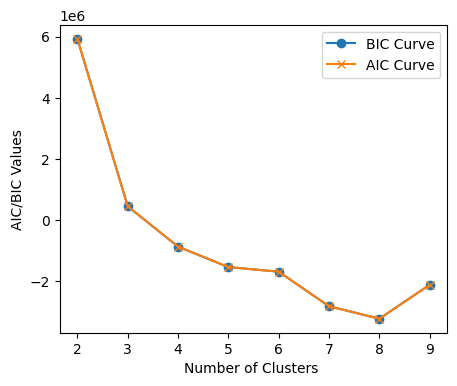

In [15]:
bic_filename = os.path.join(outdir, f"bic_scores2_10.npy" )    
aic_filename = os.path.join(outdir, f"bic_scores2_10.npy" )    
x_range = np.arange(2,10)
bic=np.load(bic_filename)
aic =np.load(aic_filename)


fig1 = plt.figure(figsize = (5,4))
plt.plot(x_range, bic, marker='o', label = "BIC Curve")
plt.plot(x_range, aic, marker='x', label = "AIC Curve")
plt.xlabel("Number of Clusters ")
plt.ylabel("AIC/BIC Values")
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
#fig1.suptitle("Elbow Method");
plt.legend()
plt.show()

In [16]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X_train)
np.round(bgm.weights_, 2)

array([0.15, 0.02, 0.  , 0.17, 0.54, 0.  , 0.07, 0.02, 0.  , 0.01])

In [11]:
gmm = GaussianMixture(n_components=7, n_init=10)

In [12]:
gmm.fit(X_train)

GaussianMixture(n_components=7, n_init=10)

In [31]:
gmm_filename = os.path.join(outdir, f"gmm_diabetese_trained.joblib" ) 
dump(gmm, gmm_filename)
   
#np.save(gmm_filename, gmm,allow_pickle=True)

['./data/processed_data\\gmm_diabetese_trained.joblib']

In [16]:
predictions = gmm.predict_proba(X_train)
predictions.shape

(183824, 7)

In [14]:
labels = gmm.predict(X_train)

In [19]:
#X_train['pred_prob'] = predictions
X_train['labels'] = labels

In [ ]:
aic_filename = os.path.join(outdir, f"aic_scores2_10.npy" )   

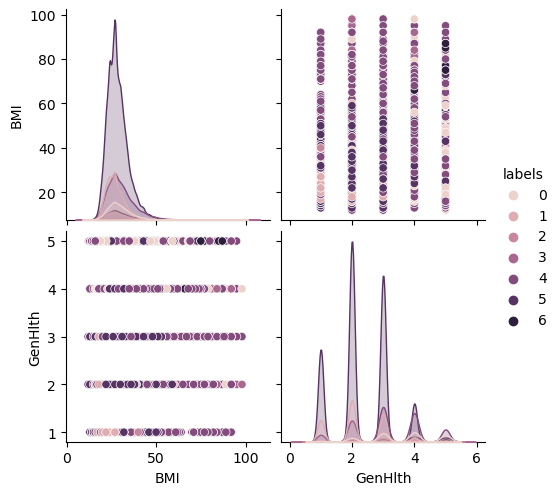

In [20]:
sns.pairplot(X_train, vars=["BMI","GenHlth"], hue="labels")

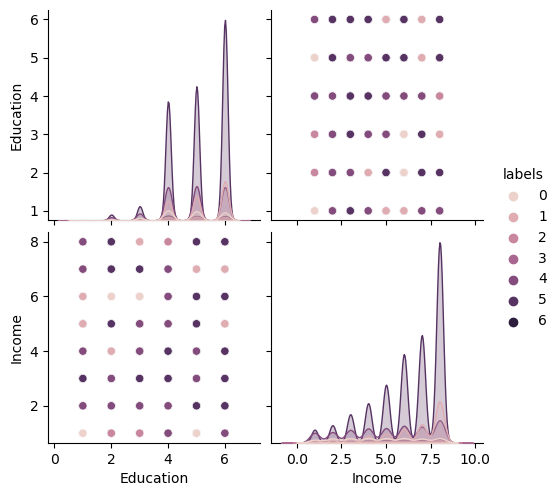

In [22]:
sns.pairplot(X_train, vars=["Education","Income"], hue="labels")

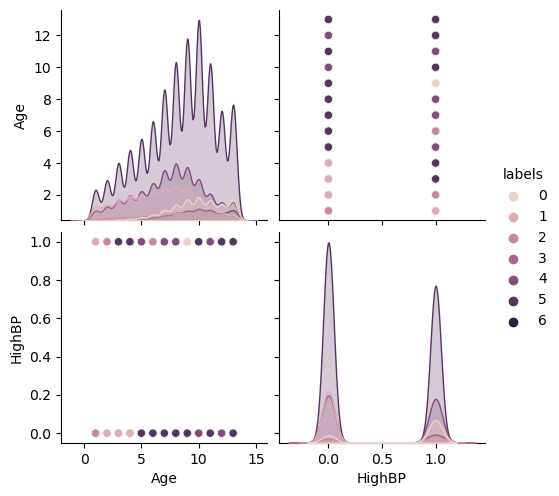

In [23]:
sns.pairplot(X_train, vars=["Age","HighBP"], hue="labels")

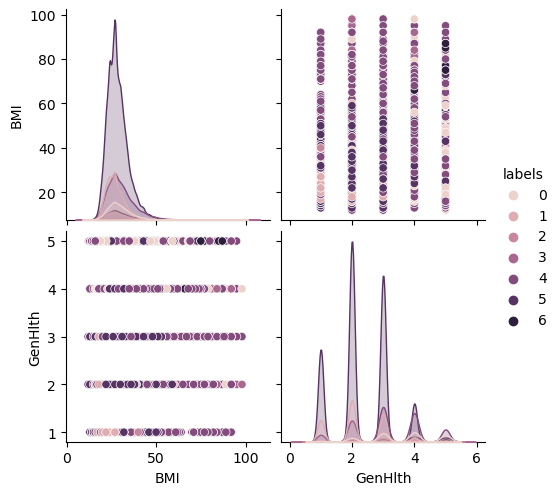

In [25]:
sns.pairplot(X_train, vars=["BMI","GenHlth"], hue="labels" , kind = "scatter",)

In [66]:
gmm.converged_

True

In [159]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

<Axes: xlabel='labels', ylabel='BMI'>

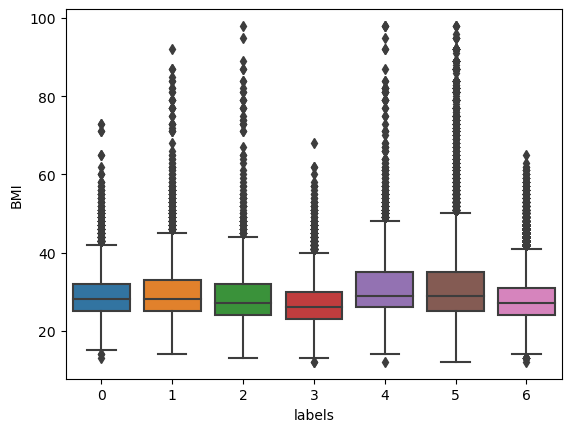

In [68]:
sns.boxplot(X_train, y='BMI',x='labels')

## KMode Algorithm

In [96]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [32]:
from kmodes.kmodes import KModes

### Find optimal number of clusters

#### Scree Plot or Elbow Curve

In [41]:
filename = os.path.join(outdir, f"diabetes_data_train.csv" )    
X_train = pd.read_csv(filename)

In [100]:
cost = []

K = range(2,7)
for num_clusters in list(K):
    kmode = KModes(num_clusters, init="random",n_init=5,verbose=1)
    kmode.fit_predict(X_train)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 53287, cost: 1470196.0
Run 1, iteration: 2/100, moves: 27950, cost: 1466035.0
Run 1, iteration: 3/100, moves: 1976, cost: 1466035.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 27780, cost: 1504916.0
Run 2, iteration: 2/100, moves: 6408, cost: 1504916.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 54084, cost: 1457448.0
Run 3, iteration: 2/100, moves: 19433, cost: 1457448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 51099, cost: 1466884.0
Run 4, iteration: 2/100, moves: 3957, cost: 1466884.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 32255, cost: 1499812.0
Run 5, iteration: 2/100, moves: 22899, cost: 1467837.

In [101]:
kmode_cost_filename = os.path.join(outdir, f"kmode_costs.npy" )    
np.save(kmode_cost_filename, cost)

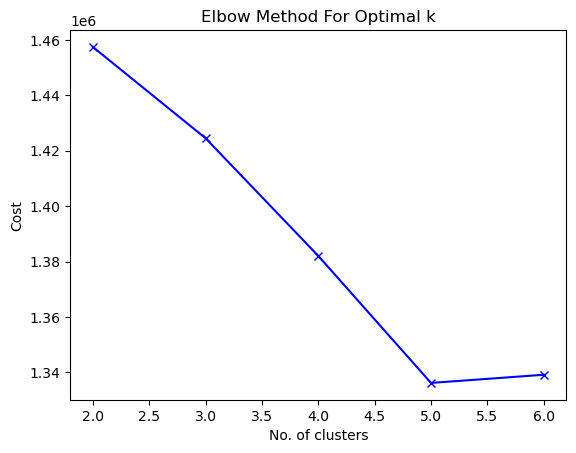

In [111]:
kmode_cost_filename = os.path.join(outdir, f"kmode_costs.npy" )      
k_range = np.arange(2,7)
k_costs=np.load(kmode_cost_filename)

plt.plot(k_range, k_costs[:5], 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Silhouette Coefficient 

In [112]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []

K = range(2,7)
for num_clusters in list(K):
    kmode = KModes(num_clusters, init="random",n_init=5,verbose=1)
    kmode_fitted=kmode.fit(X_train)
    cluster_labels = kmode_fitted.labels_
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30399, cost: 1557742.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 56467, cost: 1464983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 54677, cost: 1465630.0
Run 3, iteration: 2/100, moves: 10320, cost: 1465630.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 28645, cost: 1554347.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 23529, cost: 1500374.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 52849, cost: 1423099.0
Run 1, iteration: 2/100, moves: 7829, cost: 1423099.0
Init: initializing centroids
Init: initializing clusters
St

In [117]:
kmode_silhoutte_filename = os.path.join(outdir, f"kmode_silhouette.npy" )    
np.save(kmode_silhoutte_filename, silhouette_scores)

In [122]:
len(silhouette_scores)

5

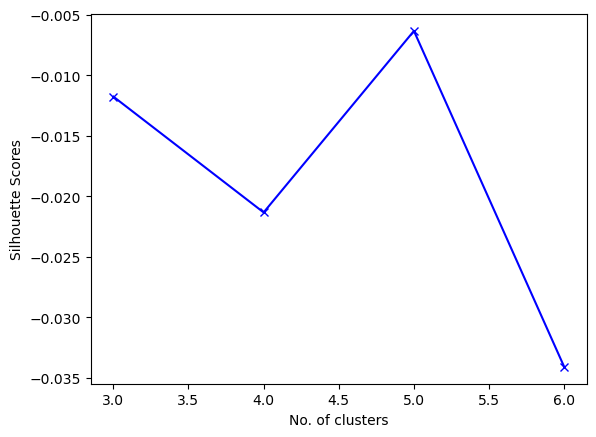

In [129]:
kmode_sil_filename = os.path.join(outdir, f"kmode_silhouette.npy" )      
k_range = np.arange(3,7)
k_sil=np.load(kmode_sil_filename)

plt.plot(k_range, k_sil[1:5], 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
#plt.title('Elbow Method For Optimal k')
plt.show()

### Train KMode for clusters 

In [42]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 76630, cost: 1158285.0
Run 1, iteration: 2/100, moves: 9298, cost: 1158285.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 41402, cost: 1199840.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 55536, cost: 1186126.0
Run 3, iteration: 2/100, moves: 2461, cost: 1186126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 86984, cost: 1187502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 71494, cost: 1158466.0
Run 5, iteration: 2/100, moves: 6611, cost: 1158466.0
Best run was number 1


In [43]:
clusters

array([1, 3, 1, ..., 1, 1, 4], dtype=uint16)

In [44]:
cluster_centers_indices = kmode.cluster_centroids_ 
n_clusters = 5


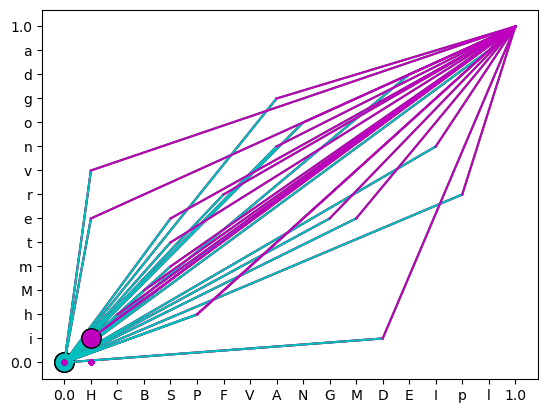

In [144]:

from itertools import cycle
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters), colors):
    class_members = clusters 
    cluster_center = cluster_centers_indices[k]
    plt.plot(X_train.iloc[class_members, 0], X_train.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X_train.iloc[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

In [45]:
X_train['kmode_labels'] = clusters

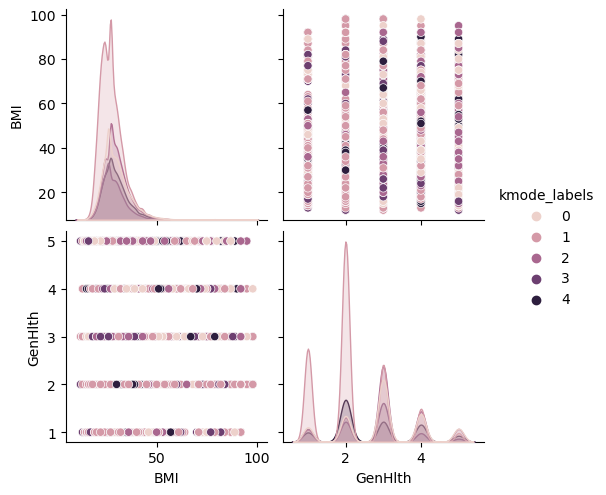

In [46]:
sns.pairplot(X_train, vars=["BMI","GenHlth"], hue="kmode_labels")

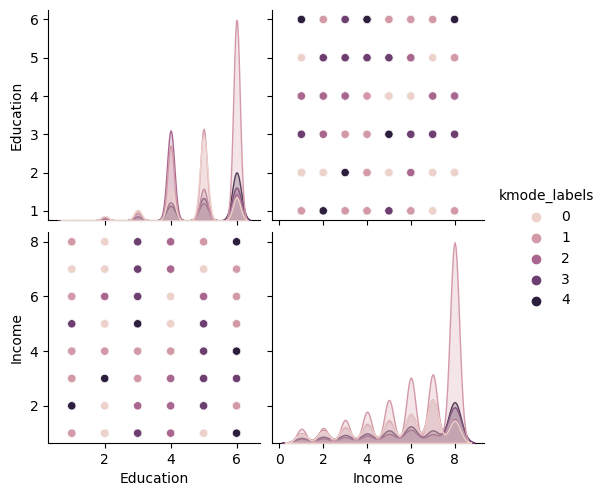

In [47]:
sns.pairplot(X_train, vars=["Education","Income"], hue="kmode_labels")

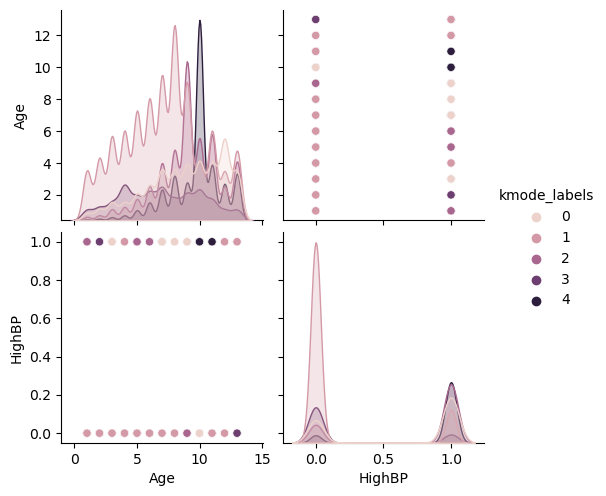

In [48]:
sns.pairplot(X_train, vars=["Age","HighBP"], hue="kmode_labels")

In [49]:
# store trained kmodes on file 
kmodes_filename = os.path.join(outdir, f"kmodes_diabetese_trained.joblib" ) 
dump(kmode, kmodes_filename)
   

['./data/processed_data\\kmodes_diabetese_trained.joblib']